# Single-Cell-Reciter

## Import the libraries

In [37]:
# Test
import os
import anndata
import scvi
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import matplotlib.pyplot as plt

from glob import glob
from pathlib import Path

## Settings

### scvi settings

In [3]:
scvi.settings.seed = 1

Global seed set to 1


In [4]:
scvi.settings.progress_bar_style = "rich"

In [5]:
scvi.settings.verbosity = logging.INFO

In [6]:
scvi.settings.dl_pin_memory_gpu_training = True

In [7]:
scvi.settings.num_threads = 20

In [8]:
scvi.settings.jax_preallocate_gpu_memory = False

### scanpy settings

In [9]:
sc.settings.verbosity = 3

In [10]:
sc.settings.set_figure_params(dpi=150)

### Output directory

In [11]:
Result_dir = "Results/"
Path(Result_dir).mkdir(parents=True, exist_ok=True)

results_file = Result_dir + 'SCC.h5ad'  # the file that will store the analysis results

## Load datasets

### Check local directory

In [12]:
!ls ../filtered_feature_bc_matrix_h5/*

../filtered_feature_bc_matrix_h5/P10.h5
../filtered_feature_bc_matrix_h5/P10_cSCC.h5
../filtered_feature_bc_matrix_h5/P1_1.h5
../filtered_feature_bc_matrix_h5/P1_1_cSCC.h5
../filtered_feature_bc_matrix_h5/P1_2_cSCC.h5
../filtered_feature_bc_matrix_h5/P2.h5
../filtered_feature_bc_matrix_h5/P2_cSCC.h5
../filtered_feature_bc_matrix_h5/P3.h5
../filtered_feature_bc_matrix_h5/P3_1_cSCC.h5
../filtered_feature_bc_matrix_h5/P3_2_cSCC.h5
../filtered_feature_bc_matrix_h5/P4.h5
../filtered_feature_bc_matrix_h5/P4_cSCC.h5
../filtered_feature_bc_matrix_h5/P5.h5
../filtered_feature_bc_matrix_h5/P5_cSCC.h5
../filtered_feature_bc_matrix_h5/P6.h5
../filtered_feature_bc_matrix_h5/P6_cSCC.h5
../filtered_feature_bc_matrix_h5/P7.h5
../filtered_feature_bc_matrix_h5/P7_cSCC.h5
../filtered_feature_bc_matrix_h5/P8.h5
../filtered_feature_bc_matrix_h5/P8_1_cSCC.h5
../filtered_feature_bc_matrix_h5/P8_2_cSCC.h5
../filtered_feature_bc_matrix_h5/P9.h5
../filtered_feature_bc_matrix_h5/P9_cSCC.h5


### SCC Datasets

In [13]:
data_SCC_P8_1 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P8_1_cSCC.h5")
data_SCC_P8_1.var_names_make_unique()
data_SCC_P8_1.obs['type'] = 'SCC'
data_SCC_P8_1.obs['sample'] = 'SCC_P8_1'

data_SCC_P8_2 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P8_2_cSCC.h5")
data_SCC_P8_2.var_names_make_unique()
data_SCC_P8_2.obs['type'] = 'SCC'
data_SCC_P8_2.obs['sample'] = 'SCC_P8_2'

data_SCC_P7 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P7_cSCC.h5")
data_SCC_P7.var_names_make_unique()
data_SCC_P7.obs['type'] = 'SCC'
data_SCC_P7.obs['sample'] = 'SCC_P7'

data_SCC_P3_1 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P3_1_cSCC.h5")
data_SCC_P3_1.var_names_make_unique()
data_SCC_P3_1.obs['type'] = 'SCC'
data_SCC_P3_1.obs['sample'] = 'SCC_P3_1'

data_SCC_P2 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P2_cSCC.h5")
data_SCC_P2.var_names_make_unique()
data_SCC_P2.obs['type'] = 'SCC'
data_SCC_P2.obs['sample'] = 'SCC_P2'

data_SCC_P5 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P5_cSCC.h5")
data_SCC_P5.var_names_make_unique()
data_SCC_P5.obs['type'] = 'SCC'
data_SCC_P5.obs['sample'] = 'SCC_P5'

data_SCC_P3_2 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P3_2_cSCC.h5")
data_SCC_P3_2.var_names_make_unique()
data_SCC_P3_2.obs['type'] = 'SCC'
data_SCC_P3_2.obs['sample'] = 'SCC_P3_2'

data_SCC_P4 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P4_cSCC.h5")
data_SCC_P4.var_names_make_unique()
data_SCC_P4.obs['type'] = 'SCC'
data_SCC_P4.obs['sample'] = 'SCC_P4'

data_SCC_P1_2 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P1_2_cSCC.h5")
data_SCC_P1_2.var_names_make_unique()
data_SCC_P1_2.obs['type'] = 'SCC'
data_SCC_P1_2.obs['sample'] = 'SCC_P1_2'

data_SCC_P9 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P9_cSCC.h5")
data_SCC_P9.var_names_make_unique()
data_SCC_P9.obs['type'] = 'SCC'
data_SCC_P9.obs['sample'] = 'SCC_P9'

data_SCC_P10 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P10_cSCC.h5")
data_SCC_P10.var_names_make_unique()
data_SCC_P10.obs['type'] = 'SCC'
data_SCC_P10.obs['sample'] = 'SCC_P10'

data_SCC_P1_1 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P1_1_cSCC.h5")
data_SCC_P1_1.var_names_make_unique()
data_SCC_P1_1.obs['type'] = 'SCC'
data_SCC_P1_1.obs['sample'] = 'SCC_P1_1'

data_SCC_P6 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P6_cSCC.h5")
data_SCC_P6.var_names_make_unique()
data_SCC_P6.obs['type'] = 'SCC'
data_SCC_P6.obs['sample'] = 'SCC_P6'

reading ../filtered_feature_bc_matrix_h5/P8_1_cSCC.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P8_2_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P7_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P3_1_cSCC.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P2_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P5_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P3_2_cSCC.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P4_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


reading ../filtered_feature_bc_matrix_h5/P1_2_cSCC.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P9_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P10_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P1_1_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P6_cSCC.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### Normal Datasets

In [14]:
data_nrl_P4 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P4.h5")
data_nrl_P4.var_names_make_unique()
data_nrl_P4.obs['type'] = 'Normal'
data_nrl_P4.obs['sample'] = 'nrl_P4'

data_nrl_P1_1 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P1_1.h5")
data_nrl_P1_1.var_names_make_unique()
data_nrl_P1_1.obs['type'] = 'Normal'
data_nrl_P1_1.obs['sample'] = 'nrl_P1_1'

data_nrl_P10 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P10.h5")
data_nrl_P10.var_names_make_unique()
data_nrl_P10.obs['type'] = 'Normal'
data_nrl_P10.obs['sample'] = 'nrl_P10'

data_nrl_P3 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P3.h5")
data_nrl_P3.var_names_make_unique()
data_nrl_P3.obs['type'] = 'Normal'
data_nrl_P3.obs['sample'] = 'nrl_P3'

data_nrl_P2 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P2.h5")
data_nrl_P2.var_names_make_unique()
data_nrl_P2.obs['type'] = 'Normal'
data_nrl_P2.obs['sample'] = 'nrl_P2'

data_nrl_P9 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P9.h5")
data_nrl_P9.var_names_make_unique()
data_nrl_P9.obs['type'] = 'Normal'
data_nrl_P9.obs['sample'] = 'nrl_P9'

data_nrl_P8 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P8.h5")
data_nrl_P8.var_names_make_unique()
data_nrl_P8.obs['type'] = 'Normal'
data_nrl_P8.obs['sample'] = 'nrl_P8'

data_nrl_P7 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P7.h5")
data_nrl_P7.var_names_make_unique()
data_nrl_P7.obs['type'] = 'Normal'
data_nrl_P7.obs['sample'] = 'nrl_P7'

data_nrl_P6 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P6.h5")
data_nrl_P6.var_names_make_unique()
data_nrl_P6.obs['type'] = 'Normal'
data_nrl_P6.obs['sample'] = 'nrl_P6'

data_nrl_P5 = sc.read_10x_h5("../filtered_feature_bc_matrix_h5/P5.h5")
data_nrl_P5.var_names_make_unique()
data_nrl_P5.obs['type'] = 'Normal'
data_nrl_P5.obs['sample'] = 'nrl_P5'

reading ../filtered_feature_bc_matrix_h5/P4.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P1_1.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P10.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P3.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P2.h5
 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P9.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P8.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P7.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P6.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading ../filtered_feature_bc_matrix_h5/P5.h5


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### Merge Datasets

In [15]:
%%time

adata = data_SCC_P1_1.concatenate(data_SCC_P10, data_SCC_P1_2, data_SCC_P2, data_SCC_P3_1, data_SCC_P3_2, 
                                  data_SCC_P4, data_SCC_P5, data_SCC_P6, data_SCC_P7, data_SCC_P8_1, 
                                  data_SCC_P8_2, data_SCC_P9, data_nrl_P10, data_nrl_P1_1, data_nrl_P2, 
                                  data_nrl_P3, data_nrl_P4, data_nrl_P5, data_nrl_P6, data_nrl_P7, 
                                  data_nrl_P8, data_nrl_P9)

# and delete individual datasets to save space
del(data_SCC_P10, data_SCC_P1_1, data_SCC_P1_2, data_SCC_P2, 
    data_SCC_P3_1, data_SCC_P3_2, data_SCC_P4, data_SCC_P5, 
    data_SCC_P6, data_SCC_P7, data_SCC_P8_1, data_SCC_P8_2, 
    data_SCC_P9, data_nrl_P10, data_nrl_P1_1, data_nrl_P2, 
    data_nrl_P3, data_nrl_P4, data_nrl_P5, data_nrl_P6, 
    data_nrl_P7, data_nrl_P8, data_nrl_P9)


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


CPU times: user 1.7 s, sys: 219 ms, total: 1.92 s
Wall time: 1.92 s


### Save merged dataset

In [16]:
adata.write(results_file)

In [17]:
print(adata.obs['sample'].value_counts())

adata

SCC_P4      12474
nrl_P9       7595
nrl_P6       7066
nrl_P2       6205
SCC_P7       5292
SCC_P2       5123
SCC_P10      5053
SCC_P8_1     4459
SCC_P6       4453
nrl_P10      4324
nrl_P1_1     3584
SCC_P9       3261
nrl_P7       3105
SCC_P5       2323
nrl_P3       1553
nrl_P5       1551
SCC_P8_2     1531
SCC_P1_1     1194
SCC_P1_2      925
nrl_P8        767
SCC_P3_2      366
nrl_P4        290
SCC_P3_1      127
Name: sample, dtype: int64


AnnData object with n_obs × n_vars = 82621 × 36601
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

## Calculate QC

### Settings

In [18]:
sc.set_figure_params(figsize=(4, 4))

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

### Data

In [19]:
adata = sc.read("Results/SCC.h5ad")
adata

AnnData object with n_obs × n_vars = 82621 × 36601
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [20]:
print(adata.obs['sample'].value_counts())

adata

SCC_P4      12474
nrl_P9       7595
nrl_P6       7066
nrl_P2       6205
SCC_P7       5292
SCC_P2       5123
SCC_P10      5053
SCC_P8_1     4459
SCC_P6       4453
nrl_P10      4324
nrl_P1_1     3584
SCC_P9       3261
nrl_P7       3105
SCC_P5       2323
nrl_P3       1553
nrl_P5       1551
SCC_P8_2     1531
SCC_P1_1     1194
SCC_P1_2      925
nrl_P8        767
SCC_P3_2      366
nrl_P4        290
SCC_P3_1      127
Name: sample, dtype: int64


AnnData object with n_obs × n_vars = 82621 × 36601
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

### Analysis

In [21]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1997 cells that have less than 200 genes expressed
filtered out 8815 genes that are detected in less than 3 cells


In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

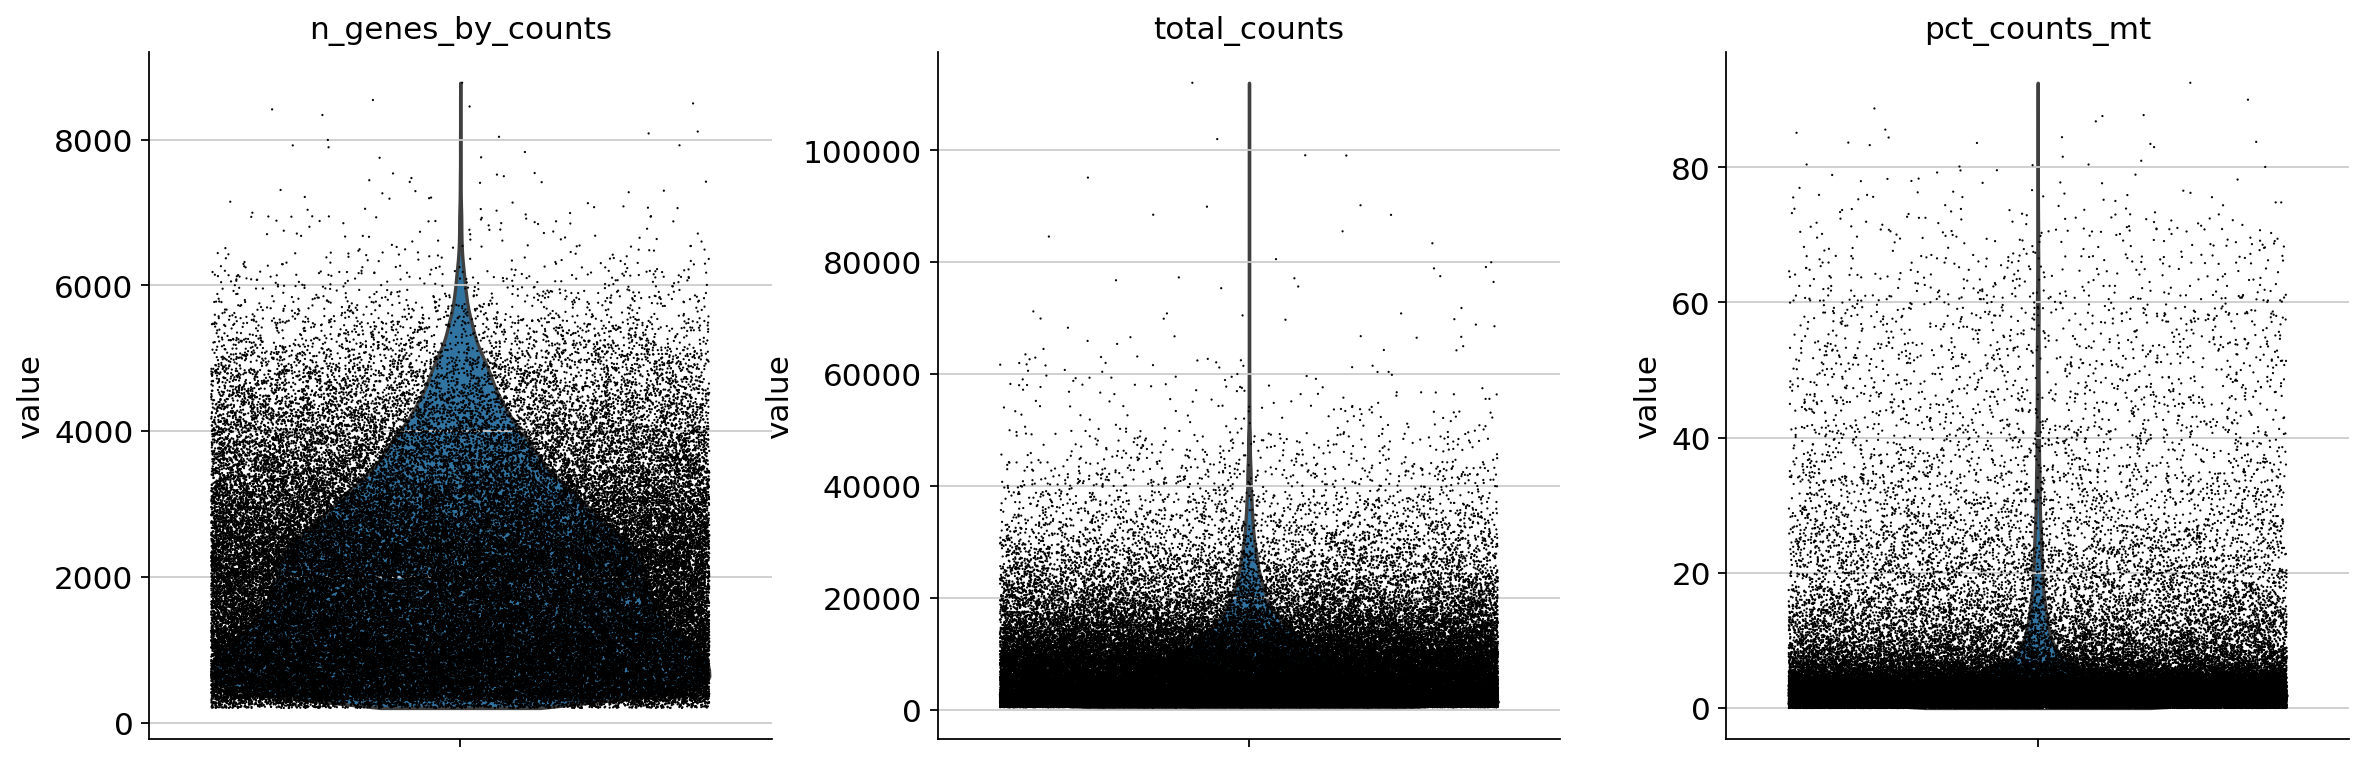

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

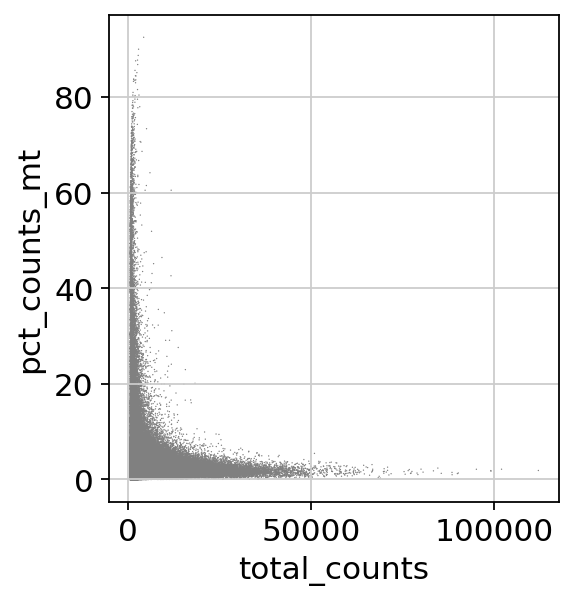

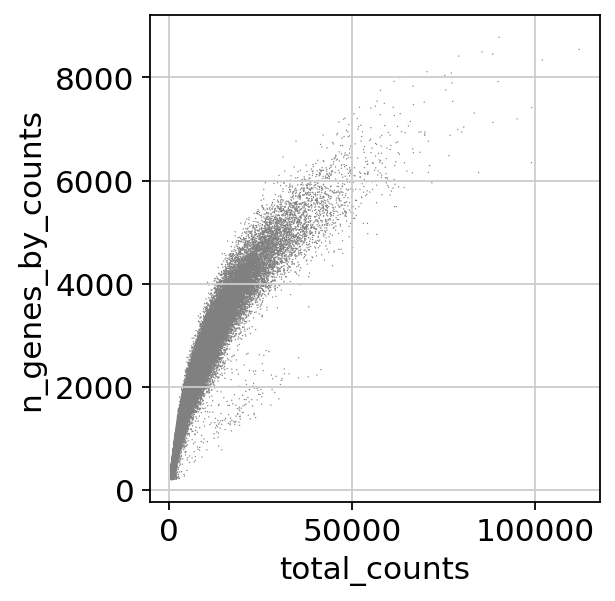

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [25]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [26]:
adata.layers["counts"] = adata.X.copy()

## Amortized LDA

In [27]:
n_topics = 10

scvi.model.AmortizedLDA.setup_anndata(adata, layer = "counts")
model = scvi.model.AmortizedLDA(adata, n_topics = n_topics)

In [28]:
scvi.model.AmortizedLDA(adata, n_topics = n_topics)

Training status: Not Trained

In [29]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:131: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 521/521: 100%|██████████| 521/521 [48:50<00:00,  5.63s/it, v_num=1, elbo_train=1.06e+9]


In [32]:
model.save("./Results/SCC_Topic_model/")

In [33]:
topic_prop = model.get_latent_representation()
topic_prop.head()

topic_0   topic_1   topic_2   topic_3   topic_4  \
AACGTTGAGAAGGACA-1-0  0.829916  0.000049  0.169068  0.000032  0.000099   
AAGACCTAGCGATTCT-1-0  0.013120  0.009625  0.517922  0.001290  0.001382   
AAGGCAGTCGGCCGAT-1-0  0.892295  0.000679  0.000403  0.000162  0.000174   
ACGAGCCAGACCTAGG-1-0  0.002354  0.000414  0.372844  0.022592  0.038067   
ACGATACCACTTCTGC-1-0  0.731500  0.033824  0.070535  0.002617  0.006130   

                       topic_5   topic_6   topic_7   topic_8   topic_9  
AACGTTGAGAAGGACA-1-0  0.000063  0.000286  0.000029  0.000077  0.000380  
AAGACCTAGCGATTCT-1-0  0.019189  0.337169  0.091506  0.000089  0.008707  
AAGGCAGTCGGCCGAT-1-0  0.000011  0.105341  0.000062  0.000046  0.000827  
ACGAGCCAGACCTAGG-1-0  0.494707  0.006735  0.048181  0.000138  0.013969  
ACGATACCACTTCTGC-1-0  0.001348  0.135870  0.000099  0.000764  0.017312

In [34]:
topic_prop

topic_0   topic_1   topic_2   topic_3   topic_4  \
AACGTTGAGAAGGACA-1-0   0.829916  0.000049  0.169068  0.000032  0.000099   
AAGACCTAGCGATTCT-1-0   0.013120  0.009625  0.517922  0.001290  0.001382   
AAGGCAGTCGGCCGAT-1-0   0.892295  0.000679  0.000403  0.000162  0.000174   
ACGAGCCAGACCTAGG-1-0   0.002354  0.000414  0.372844  0.022592  0.038067   
ACGATACCACTTCTGC-1-0   0.731500  0.033824  0.070535  0.002617  0.006130   
...                         ...       ...       ...       ...       ...   
TTTGTCACACCAGTTA-1-22  0.011401  0.108123  0.066382  0.013047  0.075459   
TTTGTCAGTCCATCCT-1-22  0.007429  0.009820  0.085311  0.592056  0.001874   
TTTGTCATCAACACGT-1-22  0.001088  0.290363  0.285026  0.001906  0.303724   
TTTGTCATCAGTCCCT-1-22  0.010114  0.481199  0.126687  0.014921  0.262758   
TTTGTCATCGACAGCC-1-22  0.242725  0.000284  0.199835  0.000063  0.000067   

                        topic_5   topic_6   topic_7   topic_8   topic_9  
AACGTTGAGAAGGACA-1-0   0.000063  0.000286  0.000029  0.000077  0.000380  
AAGACCTAGCGATTCT-1-0   0.019189  0.337169  0.091506  0.000089  0.008707  
AAGGCAGTCGGCCGAT-1-0   0.000011  0.105341  0.000062  0.000046  0.000827  
ACGAGCCAGACCTAGG-1-0   0.494707  0.006735  0.048181  0.000138  0.013969  
ACGATACCACTTCTGC-1-0   0.001348  0.135870  0.000099  0.000764  0.017312  
...                         ...       ...       ...       ...       ...  
TTTGTCACACCAGTTA-1-22  0.011147  0.034743  0.670458  0.000725  0.008515  
TTTGTCAGTCCATCCT-1-22  0.001663  0.005983  0.293159  0.000625  0.002080  
TTTGTCATCAACACGT-1-22  0.000261  0.000833  0.072329  0.000091  0.044379  
TTTGTCATCAGTCCCT-1-22  0.000404  0.002334  0.046952  0.000052  0.054579  
TTTGTCATCGACAGCC-1-22  0.000116  0.420618  0.135875  0.000087  0.000329  

[38379 rows x 10 columns]

In [47]:
topic_prop.to_parquet("./Results/parquets/topic_prop")

## UMAP analyses

In [35]:
# Save topic proportions in obsm and obs columns.
adata.obsm["X_LDA"] = topic_prop
for i in range(n_topics):
    adata.obs[f"LDA_topic_{i}"] = topic_prop[[f"topic_{i}"]]

### Raw counts umap

In [38]:
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added = "leiden_scVI", resolution = 0.8)

# Save UMAP to custom .obsm field.
adata.obsm["raw_counts_umap"] = adata.obsm["X_umap"].copy()

computing PCA
    with n_comps=50
    finished (0:00:49)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden_scVI', the cluster labels (adata.obs, categorical) (0:00:13)


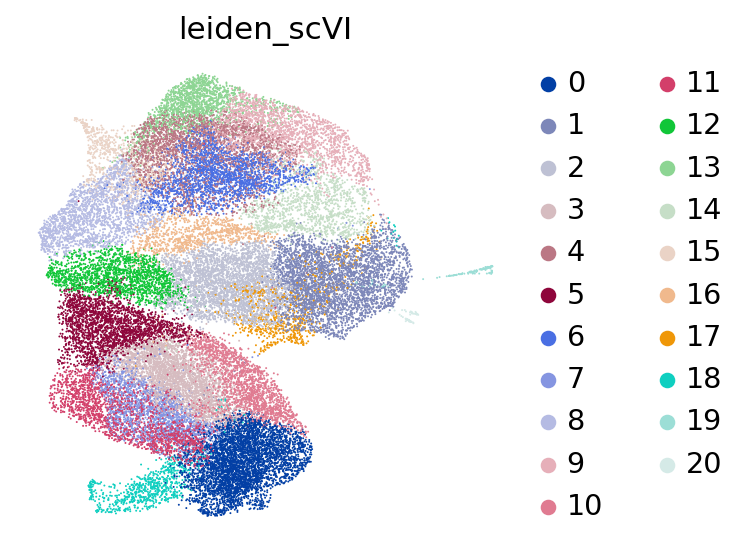

In [39]:
sc.pl.embedding(adata, "raw_counts_umap", color = ["leiden_scVI"], frameon=False)

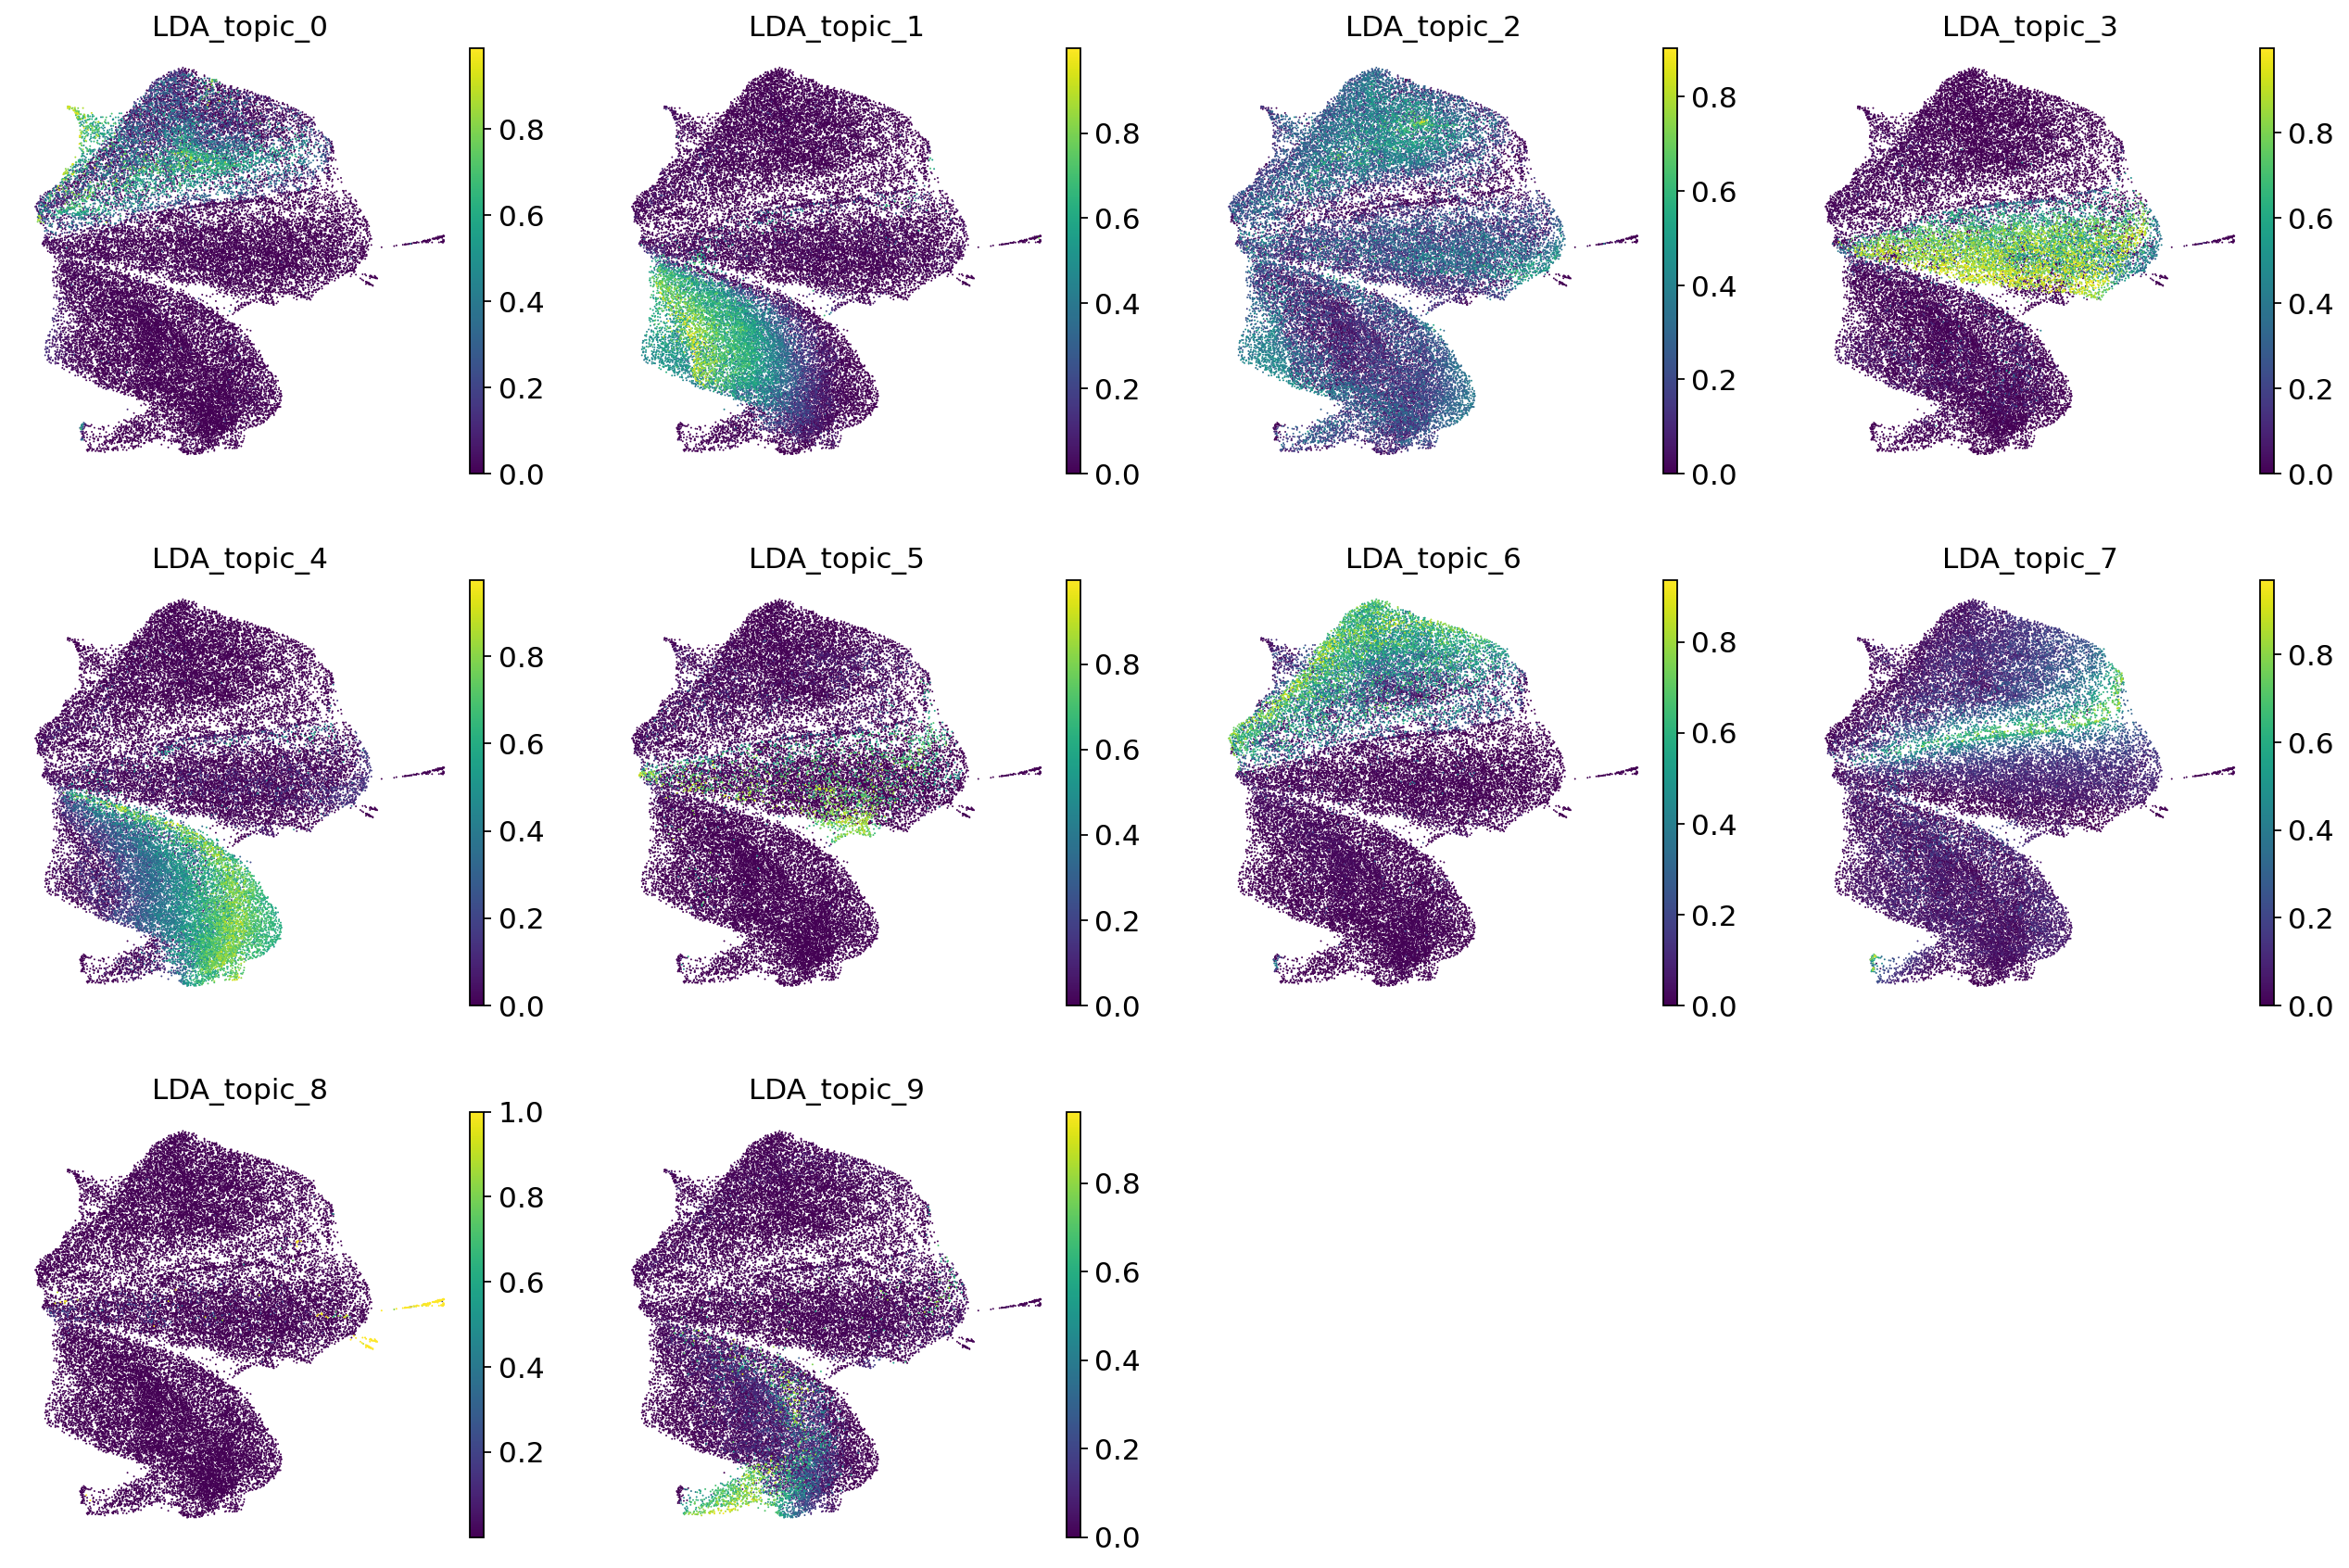

In [40]:
sc.pl.embedding(adata, "raw_counts_umap", color = [f"LDA_topic_{i}" for i in range(n_topics)], frameon=False)

### Topic space UMAP

In [41]:
sc.pp.neighbors(adata, use_rep="X_LDA", n_neighbors = 20, metric="hellinger")
sc.tl.umap(adata)

# Save UMAP to custom .obsm field.
adata.obsm["topic_space_umap"] = adata.obsm["X_umap"].copy()

computing neighbors


/home/exouser/repo1/Single-cell-reciter/.venv/lib/python3.10/site-packages/pynndescent/pynndescent_.py:1564: RuntimeWarning: invalid value encountered in correct_alternative_hellinger
  self._distance_correction(self._neighbor_graph[1]),


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:31)


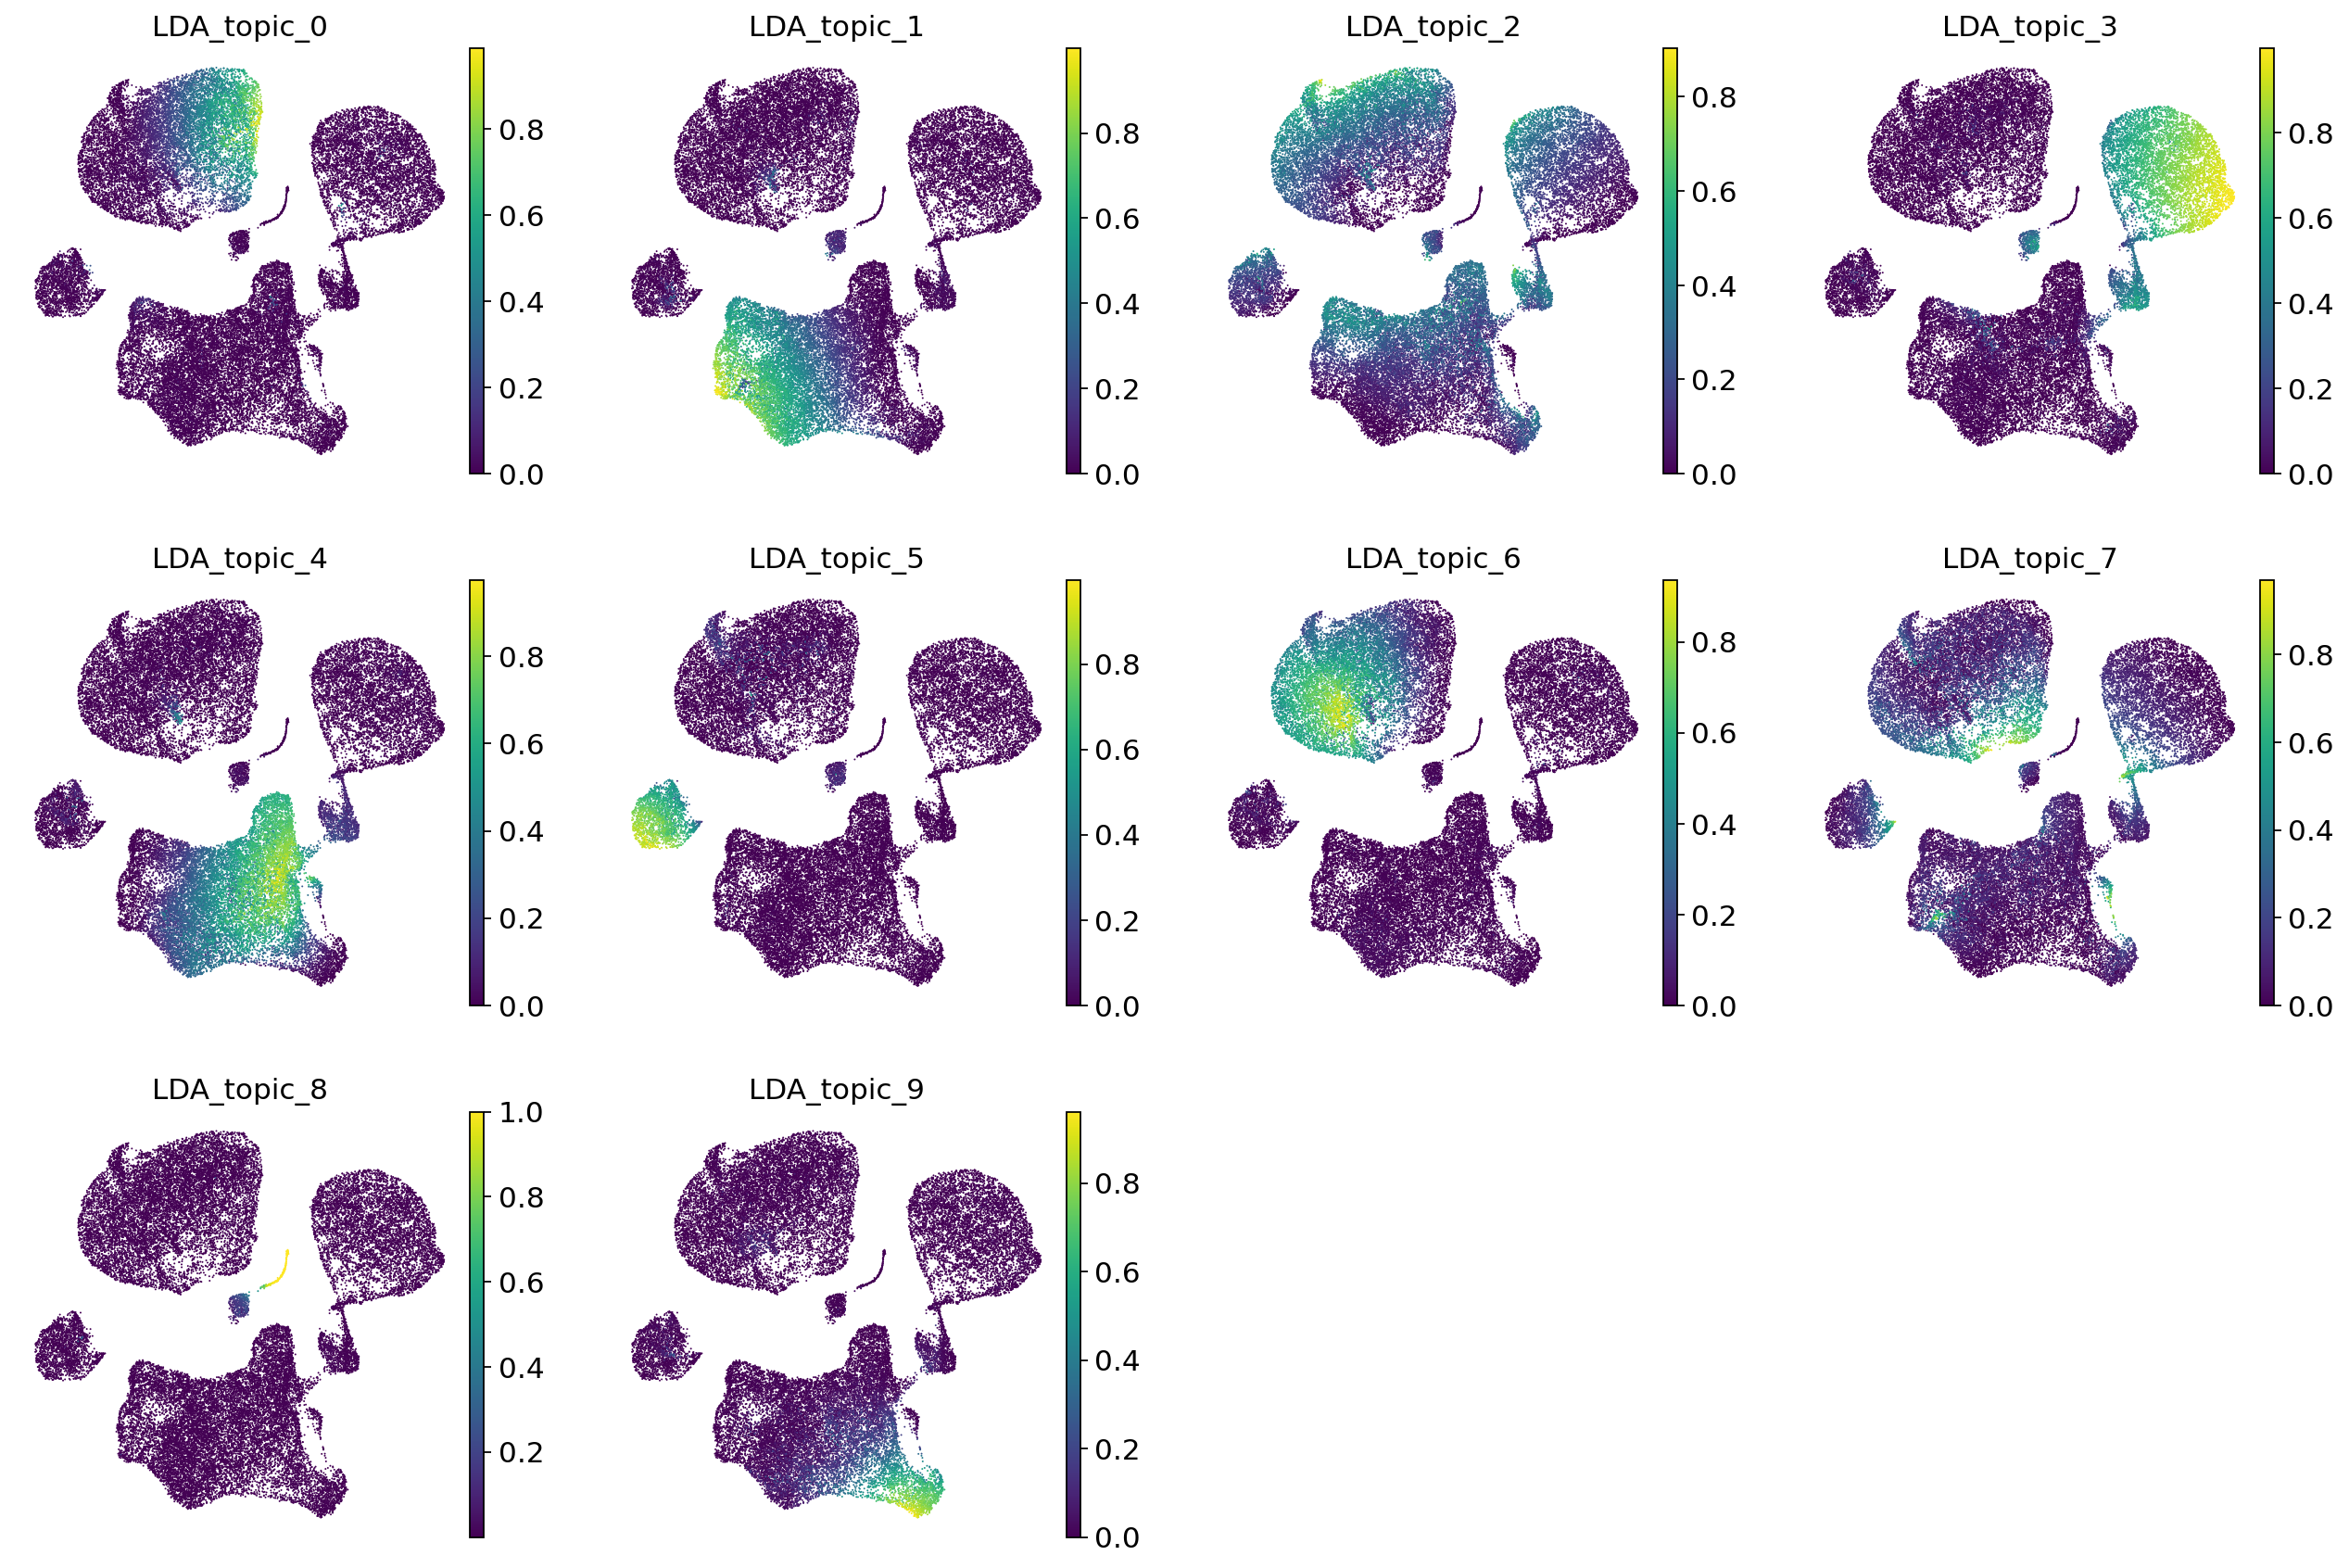

In [42]:
sc.pl.embedding(adata, "topic_space_umap", color = [f"LDA_topic_{i}" for i in range(n_topics)], frameon=False)

### Feature by topic

In [43]:
feature_by_topic = model.get_feature_by_topic()
feature_by_topic.head()

topic_0       topic_1       topic_2       topic_3  \
AL627309.1  8.124381e-08  6.299281e-08  3.770602e-08  4.136660e-07   
AL627309.3  6.801456e-08  5.438774e-08  2.975282e-08  6.663645e-08   
AL627309.5  4.751845e-07  3.424564e-07  1.180560e-07  2.846104e-07   
AP006222.2  6.791149e-08  5.229886e-08  3.139293e-08  7.152077e-08   
AL732372.1  7.174737e-08  5.103081e-08  3.181967e-08  6.634118e-08   

                 topic_4       topic_5       topic_6       topic_7  \
AL627309.1  3.703979e-08  4.922509e-07  7.005484e-08  1.508278e-07   
AL627309.3  3.129184e-08  1.324582e-07  4.143557e-08  7.340002e-08   
AL627309.5  6.543090e-07  7.186428e-07  4.930012e-07  2.969823e-06   
AP006222.2  3.022350e-08  1.512866e-07  4.373504e-08  7.690294e-08   
AL732372.1  3.095148e-08  1.334131e-07  4.215753e-08  7.389652e-08   

                 topic_8       topic_9  
AL627309.1  5.837513e-07  8.139749e-08  
AL627309.3  2.910317e-07  8.413411e-08  
AL627309.5  5.872658e-07  2.494261e-07  
AP006222.2  1.468184e-06  8.367854e-08  
AL732372.1  2.847972e-07  8.541374e-08

In [46]:
feature_by_topic.to_parquet("./Results/parquets/feature_by_topic")

### Rank by topic

In [49]:
rank_by_topic = pd.DataFrame()
for i in range(n_topics):
    topic_name = f"topic_{i}"
    topic = feature_by_topic[topic_name].sort_values(ascending=False)
    rank_by_topic[topic_name] = topic.index
    rank_by_topic[f"{topic_name}_prop"] = topic.values

In [50]:
rank_by_topic.head()

topic_0  topic_0_prop topic_1  topic_1_prop topic_2  topic_2_prop topic_3  \
0   KRT10      0.033936     FTL      0.046397   RPL41      0.020543  MALAT1   
1  S100A8      0.031268    FTH1      0.046319   RPLP1      0.019715     B2M   
2    KRT1      0.029615     B2M      0.022535   RPS18      0.018727  TMSB4X   
3  S100A9      0.017379  MALAT1      0.018665   RPL34      0.018122    ACTB   
4    DMKN      0.013410  TMSB4X      0.018553   RPL10      0.017755   HLA-B   

   topic_3_prop   topic_4  topic_4_prop topic_5  topic_5_prop topic_6  \
0      0.047206      CD74      0.046756     B2M      0.020719   KRT14   
1      0.030130   HLA-DRA      0.037377  MALAT1      0.016142     B2M   
2      0.026005    TMSB4X      0.028228    FTH1      0.013051    KRT5   
3      0.013556  HLA-DPB1      0.018892  LGALS1      0.007742  S100A2   
4      0.007536      ACTB      0.017817  S100A6      0.006821   RPLP1   

   topic_6_prop topic_7  topic_7_prop topic_8  topic_8_prop topic_9  \
0      0.071214  MALAT1      0.315985    IGKC      0.331835  MALAT1   
1      0.015304   NEAT1      0.019953   IGLC2      0.115728  TMSB4X   
2      0.014489  MT-CO1      0.008042   IGHG3      0.062447     B2M   
3      0.012359  MT-CO3      0.007642   IGLC3      0.057811    ACTB   
4      0.008502     FOS      0.007031   IGHG1      0.045358    CD74   

   topic_9_prop  
0      0.065489  
1      0.045572  
2      0.037806  
3      0.030933  
4      0.025977

In [51]:
rank_by_topic.to_parquet("./Results/parquets/rank_by_topic")